In [1]:
import numpy as np
import sys
# sys.path.pop(2)
sys.path.insert(1,'/home/zhanibek/.local/lib/python2.7/site-packages/cv2')
sys.path.insert(1,'/home/zhanibek/catkin_ws/src/smart_tray/scripts/')
from phri.utils import *
from phri.calibration import Calibrate_Camera
import cv2 
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tqdm import tqdm_notebook
import pickle
import random
%load_ext autoreload
%autoreload 2

In [2]:
cv2.__version__

'3.3.1-dev'

### Constants

In [3]:
base_dir = '../data/pose_estimation'

In [4]:
im_partial = read_image(os.path.join(base_dir, 'charuco_pose_est', 'im0_partial_view.png'))
im_full = read_image(os.path.join(base_dir, 'charuco_pose_est', 'im0_full_view.png'))

### Charuco Board for Calibration

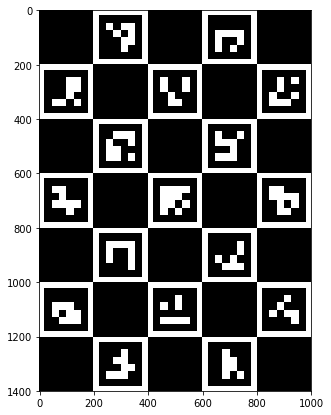

In [5]:
cal_sqlen = 0.03677
cal_mlen = 0.02959
cal_aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
calib_board = aruco.CharucoBoard_create(5, 7, cal_sqlen, cal_mlen, cal_aruco_dict)
calib_imboard = calib_board.draw((1000, 1400))

# cv2.imwrite(os.path.join(base_dir, "charuco_calibration.tiff"), imboard)

fig = plt.figure(figsize=(5,7))
showMarker(calib_imboard)
plt.show()


### Charuco Board for Detection 1

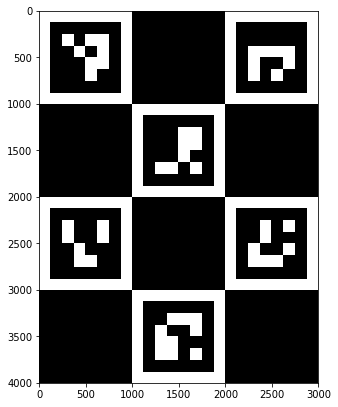

In [6]:
sqLen_1 = 0.0644
mrklen_1 = 0.04865 
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
board1 = aruco.CharucoBoard_create(3, 4, sqLen_1, mrklen_1, aruco_dict)
imboard1 = board1.draw((3000, 4000))

# cv2.imwrite(os.path.join(base_dir, "charuco_detection_1.tiff"), imboard)

fig = plt.figure(figsize=(5,7))
showMarker(imboard1)
plt.show()


### Charuco Board for Detection 2

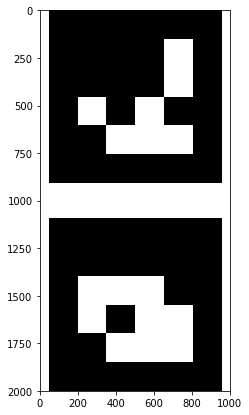

In [7]:
sep2 = 0.02274
mrklen2 = 0.11376 
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
board2 = aruco.GridBoard_create(1, 2, mrklen2, sep2, aruco_dict, 11)
# board2.ids = np.array([[11],[15]])
imboard2 = board2.draw((1000, 2000))

# cv2.imwrite(os.path.join(base_dir, "charuco_detection_2.tiff"), imboard)

fig = plt.figure(figsize=(5,7))
showMarker(imboard2)
plt.show()


# Calibrate

#### Read the data

In [209]:
# datadir = "/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t1/images/"
# datadir = "/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/angetube/images/"
datadir = "/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t2/images/"

In [210]:
images = np.array([datadir + f for f in os.listdir(datadir) if f.endswith(".png") ])
order = np.argsort([int(p.split('/')[-1].split("_")[1].split("_")[0]) for p in images])
images = images[order]
len(images)

61

In [211]:
images

array(['/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t2/images/logitech2_0_10102020125718_465262.png',
       '/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t2/images/logitech2_1_10102020125718_799040.png',
       '/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t2/images/logitech2_2_10102020125719_132422.png',
       '/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t2/images/logitech2_3_10102020125719_465723.png',
       '/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t2/images/logitech2_4_10102020125719_799026.png',
       '/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t2/images/logitech2_5_10102020125720_132403.png',
       '/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t2/images/logitech2_6_10102020125720_465729.png',
       '/home/zhanib

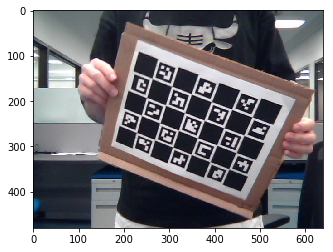

In [212]:
# Show an example of one image
im = read_image(images[10])
plt.figure()
plt.imshow(im)
#ax.axis('off')
plt.show()

In [213]:
# random.shuffle(images)

## Calibrate

In [ ]:
calib = Calibrate_Camera(calib_board)
%time cam_cal_data = calib.calibrate(images)

In [208]:
images[60]

'/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t2/images/logitech2_146_10102020125807_132382.png'

#### Save the results

In [122]:
# Save the results
#cname = os.path.join(base_dir, 'calibration/logitech_t1/calibration_matrix_logitech_1.pkl')
# cname = os.path.join(base_dir, 'calibration/angetube/calibration_matrix_angetube.pkl')
cname = os.path.join(base_dir, 'calibration/logitech_t1/calibration_matrix_logitech_t2.pkl')

with open(cname, 'wb') as f:
    pickle.dump(cam_cal_data, f)
    
    

In [123]:
cname

'../data/pose_estimation/calibration/angetube/calibration_matrix_angetube.pkl'

#### Visualize Calibration

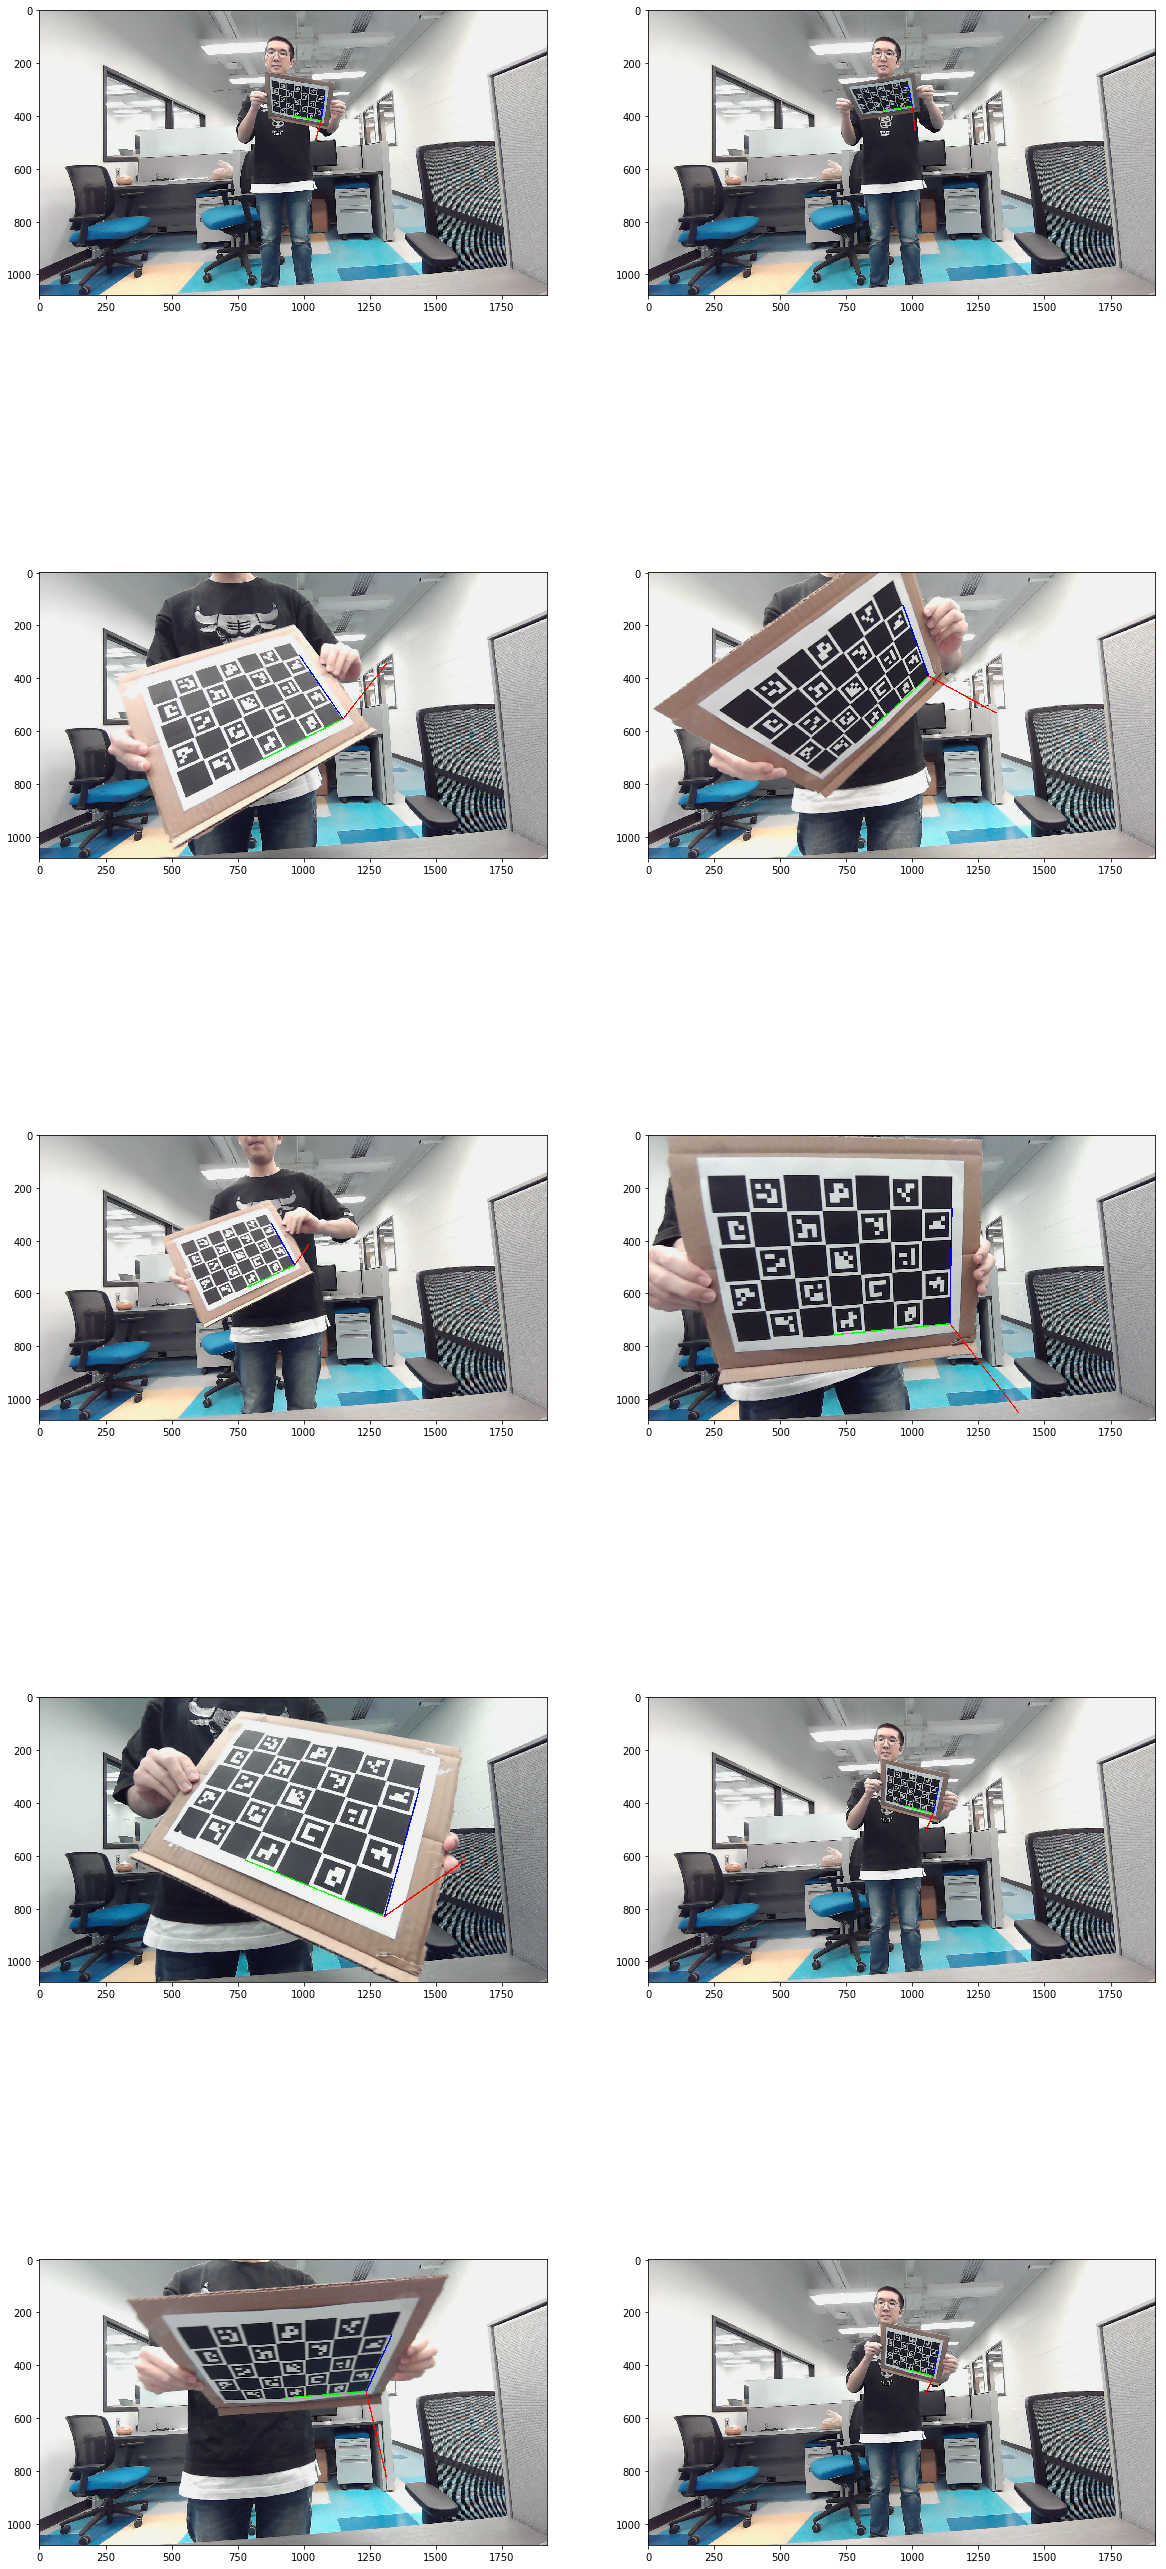

In [124]:
inds = np.random.randint(101, size=10)

plt.figure(figsize=(20,50))

for i, ind in enumerate(inds):
    img = read_image(images[ind])
    a,b,c = aruco.detectMarkers(img, calib_board.dictionary)
    img = aruco.drawAxis(img, cam_cal_data['cameraMatrix'], cam_cal_data['distCoeffs'],
              cam_cal_data['rotationVector'][ind], cam_cal_data['translationVector'][ind], 5*cal_mlen)
    
    plt.subplot(5,2,i+1)
    plt.imshow(img)
plt.show()

In [125]:
cam_cal_data

{'cameraMatrix': array([[869.41374442,   0.        , 986.72010981],
        [  0.        , 868.79524322, 491.84396142],
        [  0.        ,   0.        ,   1.        ]]),
 'distCoeffs': array([[-2.72916381e-02,  5.84333722e-02, -5.61004719e-03,
          1.21938899e-05, -1.00107964e-01]]),
 'reprojectionError': 0.06338853580614955,
 'rms': 0.6073010563790113,
 'rotationVector': [array([[-2.13604517],
         [ 2.13411925],
         [ 0.0892108 ]]), array([[-2.00310333],
         [ 2.08047551],
         [ 0.03310715]]), array([[-1.98650396],
         [ 2.15784823],
         [ 0.03674321]]), array([[-2.00710668],
         [ 2.21160303],
         [ 0.0651567 ]]), array([[-2.0694317 ],
         [ 2.31156342],
         [-0.0442475 ]]), array([[ 1.98229539],
         [-2.21203428],
         [ 0.21113812]]), array([[ 1.89977435],
         [-1.97280128],
         [ 0.36948443]]), array([[ 1.87404743],
         [-1.75077787],
         [ 0.44374081]]), array([[ 1.96662563],
         [-1.5858